# Bài toán dự đoán doanh thu (advertising)

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('data/advertising.csv')
df[:5]

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [29]:
data = df.values
data[:5]

array([[230.1,  37.8,  69.2,  22.1],
       [ 44.5,  39.3,  45.1,  10.4],
       [ 17.2,  45.9,  69.3,  12. ],
       [151.5,  41.3,  58.5,  16.5],
       [180.8,  10.8,  58.4,  17.9]])

In [30]:
X = data[:,:3]
y = data[:, 3:].reshape(-1,1)

In [31]:
m = data.shape[0]
maxi = np.max(X)
mini = np.min(X)
avg = np.mean(X)

X = (X-avg)/(maxi - mini)
X[:5]

array([[ 0.55042679, -0.09835864,  0.00757928],
       [-0.07575405, -0.09329791, -0.07372976],
       [-0.16785931, -0.0710307 ,  0.00791667],
       [ 0.2852446 , -0.08655027, -0.02852058],
       [ 0.3840975 , -0.18945175, -0.02885796]])

In [32]:
X_train = np.c_[np.ones((m,1)), X]
print(X_train[:5])

m,n = X_train.shape
print(m,n)

[[ 1.          0.55042679 -0.09835864  0.00757928]
 [ 1.         -0.07575405 -0.09329791 -0.07372976]
 [ 1.         -0.16785931 -0.0710307   0.00791667]
 [ 1.          0.2852446  -0.08655027 -0.02852058]
 [ 1.          0.3840975  -0.18945175 -0.02885796]]
200 4


### 1. Huấn luyện theo SGD

In [33]:
def stochastic_gradient_descent():
    epoches = 50
    learning_rate = 0.01
    
    #init parameter
    thetas = np.random.randn(n,1)
    
    thetas_path = []
    losses = []
    
    for epoch in range(epoches):
        for i in range(m):
            
            #Lay ngau nhien 1 sample
            random_index = np.random.randint(m)
            x_i = X_train[random_index:random_index+1]
            y_i = y[random_index:random_index+1]
            
            #tinh y_hat
            y_hat = np.dot(x_i, thetas)
            
            #tinh loss_i
            loss_i = (y_hat - y_i)**2
            
            #tinh gradient cho loss
            grad_loss_i = 2*(y_hat - y_i)
            
            #tinh gradient
            gradients = np.dot(x_i.T, grad_loss_i)
            
            #update thetas
            thetas = thetas - learning_rate*gradients
            
            #logging
            thetas_path.append(thetas)
            losses.append(loss_i[0][0])
    
    return thetas_path, losses            

In [34]:
sgd_thetas, losses = stochastic_gradient_descent()

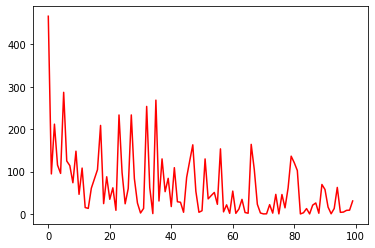

In [35]:
#In loss cho 100 sample dau tien
x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color='r')
plt.show()

### 2. Huấn luyện theo MBGD

In [36]:
def mini_batch_gradient_descent():
    epoches = 200
    learning_rate = 0.01
    minibatch_size = 64
    
    thetas = np.random.randn(n,1)
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(epoches):
        shuffled_indices = np.random.permutation(m)
        X_train_shuffled = X_train[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, m, minibatch_size):
            x_i = X_train_shuffled[i:i+minibatch_size]
            y_i = y_shuffled[i:i+minibatch_size]
            
            y_hat = np.dot(x_i, thetas)
            
            loss = (y_hat - y_i)**2
            
            loss_grd = 2*(y_hat - y_i)/minibatch_size
            
            gradients = np.dot(x_i.T, loss_grd)
            
            thetas = thetas - learning_rate*gradients
            thetas_path.append(thetas)
            
            loss_mean = np.sum(loss)/minibatch_size
            losses.append(loss_mean)
            
    return thetas_path, losses

In [37]:
mgbd_thetas, losses = mini_batch_gradient_descent()

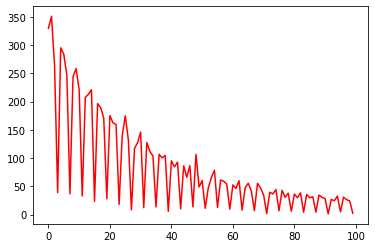

In [38]:
#in loss cho 100 sample dau
x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color='r')
plt.show()

### 3. Huấn luyện theo BGD

In [39]:
def bath_gradient_descent():
    epoches = 500
    learning_rate = 0.01
    
    #init parameter
    thetas = np.random.randn(n,1)
    
    thetas_path = []
    losses = []
    
    for epoch in range(epoches):
        y_hat = np.dot(X_train, thetas)
            
        loss = (y_hat - y)**2
            
        loss_grd = 2*(y_hat - y)/m
            
        gradients = np.dot(X_train.T, loss_grd)
            
        thetas = thetas - learning_rate*gradients
        thetas_path.append(thetas)
            
        loss_mean = np.sum(loss)/m
        losses.append(loss_mean)
            
    return thetas_path, losses
        

In [40]:
bgd_thetas, losses = bath_gradient_descent()

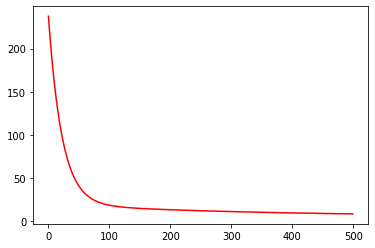

In [41]:
#in loss cho 500 sample dau tien
x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color='r')
plt.show()